In [282]:
%run ./func.ipynb

In [283]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Premi

In [284]:
I = J = 50

num_rows_columns = 50
demand_points, candidate_sites = generate_instance(num_rows_columns, I, J, seed=42)

alpha = .0
beta = 0.5

p = 2
r = 2

h_i = np.full(I, 1 / I)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

In [285]:
distances = compute_distances(demand_points, candidate_sites)
print("\nDistances:", distances)

# w_ij の計算
w_ij = compute_wij_matrix(distances, alpha, beta)
print("\nw_ij Matrix:", w_ij)

# U_i^L の計算
Ui_L = compute_Ui_L(w_ij, J_L)
print("\nU_i^L:", Ui_L)

# U_i^F の計算
Ui_F = compute_Ui_F(w_ij, J_F)
print("\nU_i^F:", Ui_F)


Distances: [[22.09072203 10.44030651 31.11269837 ... 18.60107524 21.9317122
   2.82842712]
 [36.40054945 37.12142239 22.56102835 ... 40.85339643 18.60107524
  25.07987241]
 [30.59411708 11.18033989 42.42640687 ...  7.61577311 33.24154028
  11.66190379]
 ...
 [23.53720459  5.         37.01351105 ... 14.56021978 28.01785145
   9.05538514]
 [15.62049935 35.22782991 15.62049935 ... 51.4781507  18.02775638
  34.92849839]
 [35.34119409 40.19950248 17.         ... 46.5295605  16.1245155
  29.41088234]]

w_ij Matrix: [[1.59610207e-05 5.40650049e-03 1.75373266e-07 ... 9.13750933e-05
  1.72818092e-05 2.43116734e-01]
 [1.24658277e-08 8.69331764e-09 1.26163852e-05 ... 1.34523352e-09
  9.13750933e-05 3.58075744e-06]
 [2.27285582e-07 3.73439317e-03 6.12664624e-10 ... 2.21950375e-02
  6.04910668e-08 2.93528157e-03]
 ...
 [7.74392188e-06 8.20849986e-02 9.17525617e-09 ... 6.89109834e-04
  8.24139747e-07 1.08055805e-02]
 [4.05556777e-04 2.24064952e-08 4.05556777e-04 ... 6.63226095e-12
  1.21708929e-04 

In [286]:
x_opt, y_opt, gamma, hist_Lhat, hist_Lcont, hist_dx, hist_dy = ogda_dinkelbach(w_ij, Ui_L, Ui_F, h_i, p, r)
print("x:", np.round(x_opt, 3))
print("y:", np.round(y_opt, 3))


🌸🌸🌸  Iteration 1  🌸🌸🌸
🔧  After rounding:
     ➤ x (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
     ➤ x ( binbin): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
     ➤ y (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
     ➤ y ( binbin): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
📈  Objective L(x, y) = 0.375714
📈  Objective L̂(x, y) = 0.375714
🔍  dx = 0.00e+00, dy = 3.85e-03

🌸🌸🌸  Iteration 2  🌸🌸🌸
🔧  After rounding:
     ➤ x (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.

In [287]:
x_bin = round_to_binary_best_k(x_opt, p)
print("Binary x:", np.round(x_bin, 3))
y_bin = round_to_binary_best_k(y_opt, r)
print("Binary y:", np.round(y_bin, 3))

Binary x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Binary y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [288]:
print('l', compute_L(h_i, Ui_L, Ui_F, w_ij, x_bin, y_bin))

l 0.375714461467612


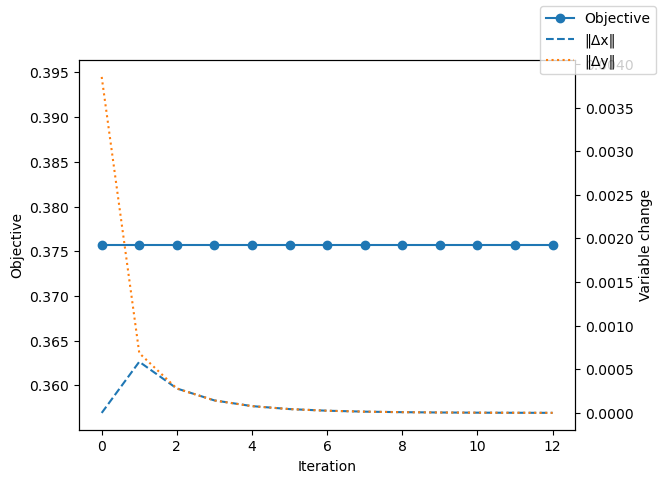

In [289]:
fig, ax1 = plt.subplots()
ax1.plot(hist_Lcont, label='Objective', marker='o')
ax2 = ax1.twinx()
ax2.plot(hist_dx,  label='‖Δx‖',  ls='--')
ax2.plot(hist_dy,  label='‖Δy‖',  ls=':')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax2.set_ylabel('Variable change')
fig.legend(loc='upper right')
plt.show()

In [290]:
print('sum x:', np.sum(x_opt))
print('sum y:', np.sum(y_opt))

sum x: 1.9996772433704322
sum y: 0.0200355073550915
